# Prosper Loan Exploration
## by Ban Choon Chua

## Preliminary Wrangling

We are exploring a dataset containing 113937 loan applicantions

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df = df.rename(columns = {'ProsperRating (numeric)': 'ProsperRating_numeric', 'ProsperRating (Alpha)': 'ProsperRating_Alpha',
                         'ListingCategory (numeric)': 'ListingCategory_numeric', 'TradesNeverDelinquent (percentage)': 'TradesNeverDelinquent_percentage'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [7]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating_numeric,ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

There are a total of 113937 loans in the dataset with majority being numeric in nature, while others being ordered facor variables with the following levels:

(worst) ——> (best)
ProsperScore: 1 - 10, with 10 being the lowest risk score
ProsperRating_numeric : 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA


### What is/are the main feature(s) of interest in your dataset?

Understanding the what affects the borrower rates by looking at prosper score, employment, credit score, income and any history the borrower has pior to the loan

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features in the dataset that can help:
- Credit Score
- Prosper Score
- Employment
- Type of Loan
- Borrower rates
- Income
- LoanCurrentDaysDelinquent

## Univariate Exploration

## 1. CreditScoreRangeLower

In [8]:
df['CreditScoreRangeLower'].min(), df['CreditScoreRangeLower'].max()

(0.0, 880.0)

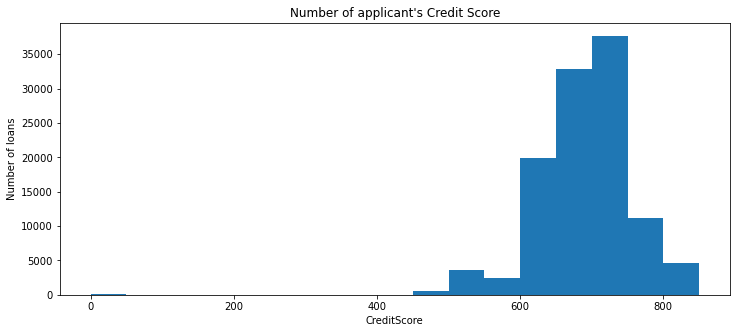

In [9]:
binsize = 50
bins = np.arange(0, df['CreditScoreRangeLower'].max(), binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'CreditScoreRangeLower', bins = bins)
plt.xlabel('CreditScore')
plt.ylabel('Number of loans')
plt.title("Number of applicant's Credit Score");

We can see that there are a few outliers especially some who has a credit score of 0 which we will remove

In [10]:
#Removing entries with less than 400 since the plot is highly skewed and providing more consistencies
df = df[df['CreditScoreRangeLower'] > 400]

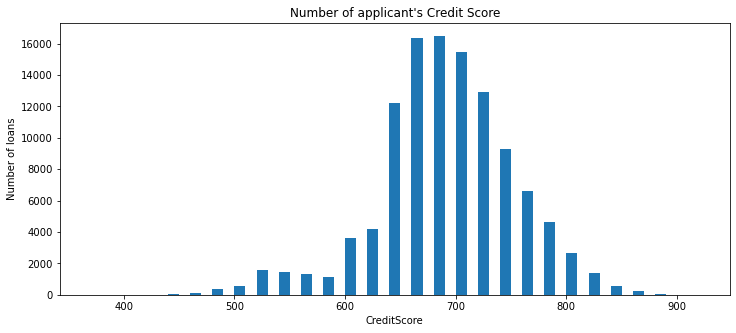

In [11]:
binsize = 10
bins = np.arange(df['CreditScoreRangeLower'].min()-50, df['CreditScoreRangeLower'].max()+50, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'CreditScoreRangeLower', bins = bins)
plt.xlabel('CreditScore')
plt.ylabel('Number of loans')
plt.title("Number of applicant's Credit Score");

We can see that majority of the borrower has a credit score of 700 +/- 50

## 2. ProsperScore 

In [12]:
df['ProsperScore'].min(), df['ProsperScore'].max()

(1.0, 11.0)

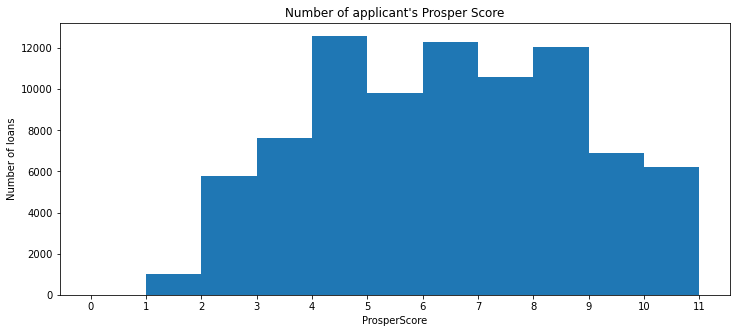

In [13]:
binsize = 1
bins = np.arange(0, df['ProsperScore'].max()+1, binsize)
ticks = np.arange(0,12,1)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'ProsperScore', bins = bins)
plt.xticks(ticks)
plt.xlabel('ProsperScore')
plt.ylabel('Number of loans')
plt.title("Number of applicant's Prosper Score");

The distribution above are quite binomial

## 3. BorrowerRate

In [14]:
df['BorrowerRate'].min(), df['BorrowerRate'].max()

(0.0, 0.36)

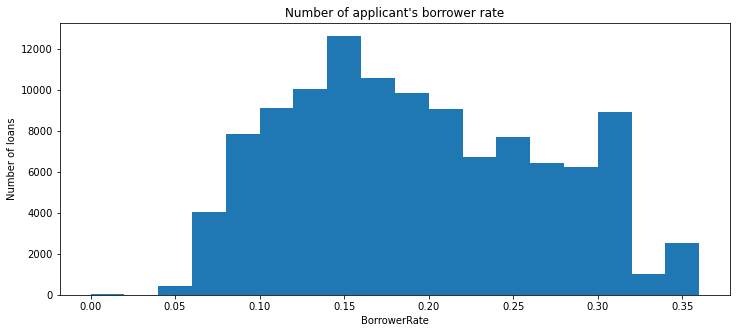

In [15]:
binsize = 0.02
bins = np.arange(0, df['BorrowerRate'].max()+0.02, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.ylabel('Number of loans')
plt.title("Number of applicant's borrower rate");

Since there is a borrower rate of 0% which is highly not possible, we will remove it

In [16]:
#Removing borrower rate that is less than 0.03% providing more consistency
df = df[df['BorrowerRate'] >= 0.03]

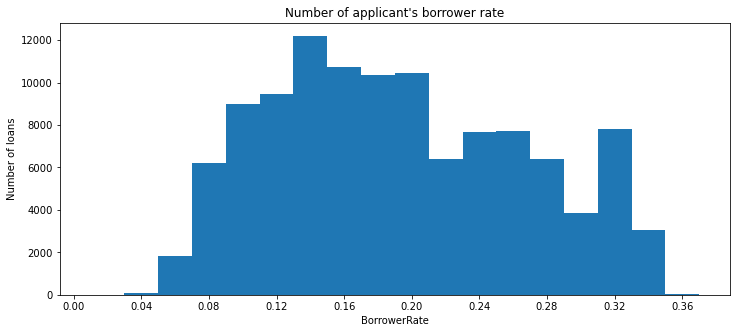

In [17]:
binsize = 0.02
bins = np.arange(df['BorrowerRate'].min()-0.02, df['BorrowerRate'].max()+0.02, binsize)
ticks = np.arange(0,df['BorrowerRate'].max()+0.02, 0.04)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xticks(ticks)
plt.xlabel('BorrowerRate')
plt.ylabel('Number of loans')
plt.title("Number of applicant's borrower rate");

We can see that the majority of the borrower rate lies between 0.14 - 0.16 %

## 4. ListingCategory_numeric 

In [18]:
df['ListingCategory_numeric'].value_counts()

1     58305
0     16221
7     10493
2      7433
3      7188
6      2572
4      2394
13     1996
15     1522
18      885
14      876
20      771
19      768
5       755
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory_numeric, dtype: int64

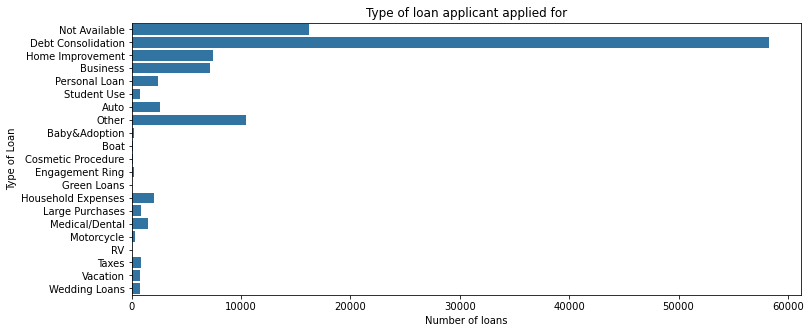

In [19]:
binsize = 1
bins = np.arange(0,21,binsize)
name = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 
        'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 
        'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
ticks = np.arange(0,21,1)
default_color = sb.color_palette()[0]

plt.figure(figsize=[12, 5])
sb.countplot(data=df, y='ListingCategory_numeric', color = default_color)
plt.yticks(ticks,name)
plt.xlabel('Number of loans')
plt.ylabel('Type of Loan')
plt.title("Type of loan applicant applied for");

We can see that majority of the loan is used for debt consolidation

## 5. EmploymentStatus

In [20]:
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26342
Self-employed     6132
Not available     5237
Other             3806
Part-time         1086
Not employed       834
Retired            795
Name: EmploymentStatus, dtype: int64

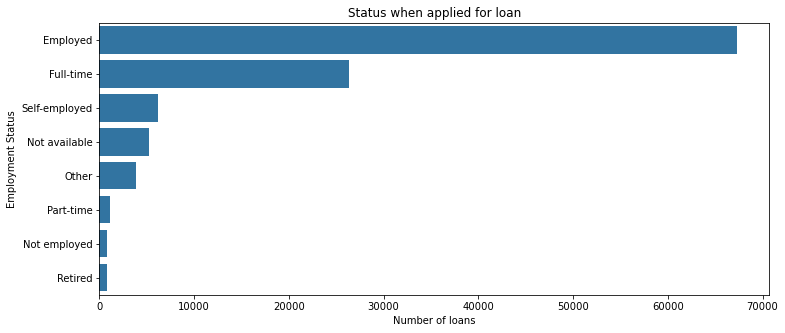

In [21]:
freq = df['EmploymentStatus'].value_counts()
order = freq.index

plt.figure(figsize=[12, 5])
sb.countplot(data=df, y='EmploymentStatus', color = default_color, order = order)
plt.xlabel('Number of loans')
plt.ylabel('Employment Status')
plt.title('Status when applied for loan');

The chart above show that the highest amount of people who has loan are those who are employed, while part-time, not employed and retired are the lowest.

## 6. IncomeRange

In [22]:
df['IncomeRange'].value_counts()

$25,000-49,999    32186
$50,000-74,999    31049
$100,000+         17336
$75,000-99,999    16915
$1-24,999          7267
Not displayed      7008
Not employed        806
$0                  619
Name: IncomeRange, dtype: int64

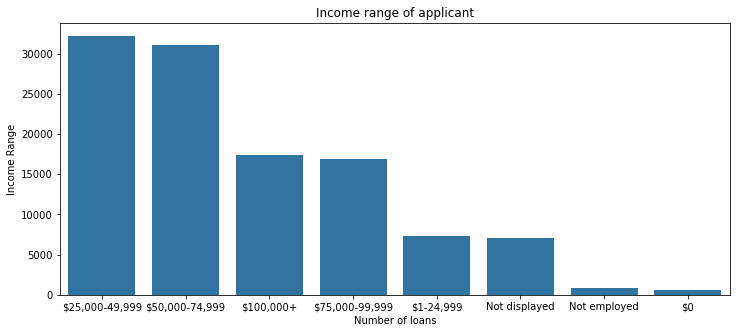

In [23]:
freq = df['IncomeRange'].value_counts()
order = freq.index

plt.figure(figsize=[12, 5])
sb.countplot(data = df, x= 'IncomeRange', color = default_color, order = order)
plt.xlabel('Number of loans')
plt.ylabel('Income Range')
plt.title('Income range of applicant');

Those who earn from 25K to 74.9K applied for the most loans compared to the rest, while not employed and 0 income are the lowest which is understable

## 7. LoanCurrentDaysDelinquent 

In [24]:
df['LoanCurrentDaysDelinquent'].min(), df['LoanCurrentDaysDelinquent'].max()

(0, 2704)

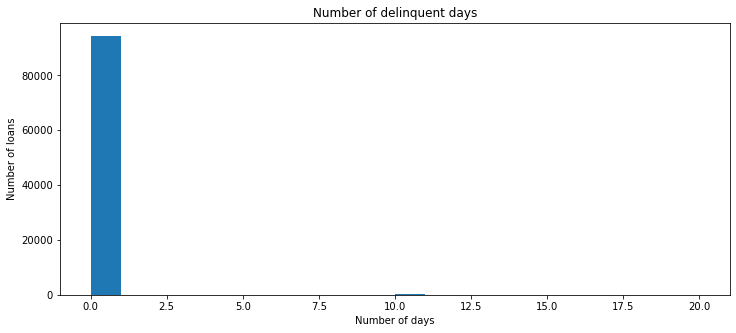

In [25]:
plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.xlabel('Number of days')
plt.ylabel('Number of loans')
plt.title('Number of delinquent days');

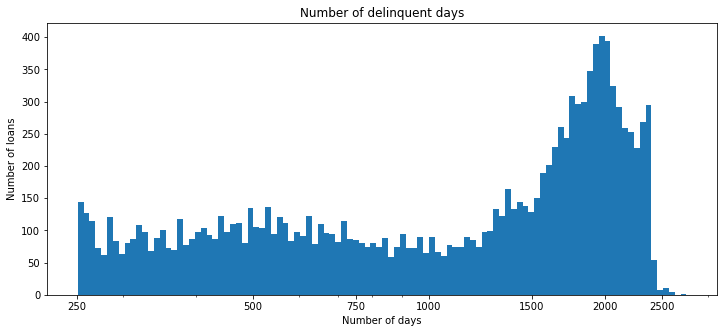

In [26]:
log_binsize = 0.01
bins = 10 ** np.arange(2.4, np.log10(df['LoanCurrentDaysDelinquent'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.xscale('log')
plt.xticks([250, 500, 750, 1000, 1500, 2000, 2500], [250, 500, 750, 1000, 1500, 2000, 2500])
plt.xlabel('Number of days')
plt.ylabel('Number of loans')
plt.title('Number of delinquent days');

The LoanCurrentDayDelinquent chart doesn't tell us much until we apply a log-scale, we can see that there is a peak at 2000 days

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The LoanCurrentDaysDelinquent variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked left skewed, with one peak between 1750 and 2000, and another around 2300

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I was required to remove several outliers such as Credit Score below 400 as most of the data was at the far right in the chart, indicating that there is strong outlier, and Borrower rate below 0.03% as there were many rates which were either 0% and number of loan at 0%-2% were insignificant.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [27]:
numeric_vars = ['CreditScoreRangeLower', 'LoanCurrentDaysDelinquent', 'BorrowerRate']
categoric_vars = ['ProsperScore', 'EmploymentStatus', 'ListingCategory_numeric', 'IncomeRange']

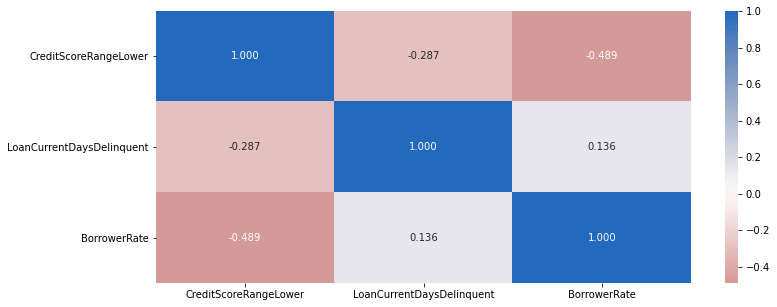

In [28]:
plt.figure(figsize = [12, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

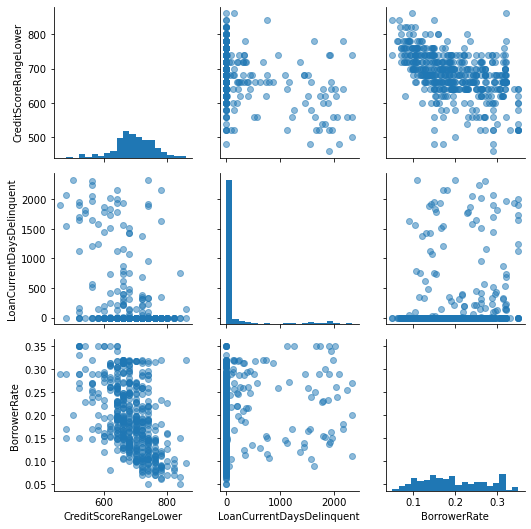

In [29]:
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.reindex(index = samples)

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 1/2);

As expected, there is a negative correlation between Credit Score and Borrower Rate since the lower the credit score, the higher the borrower rate in case of delinquencies. However, there is no significant correlation between LoanCurrentDaysDelinquent vs CreditScore and LoanCurrentDaysDelinquent vs BorrowerRate

<Figure size 720x720 with 0 Axes>

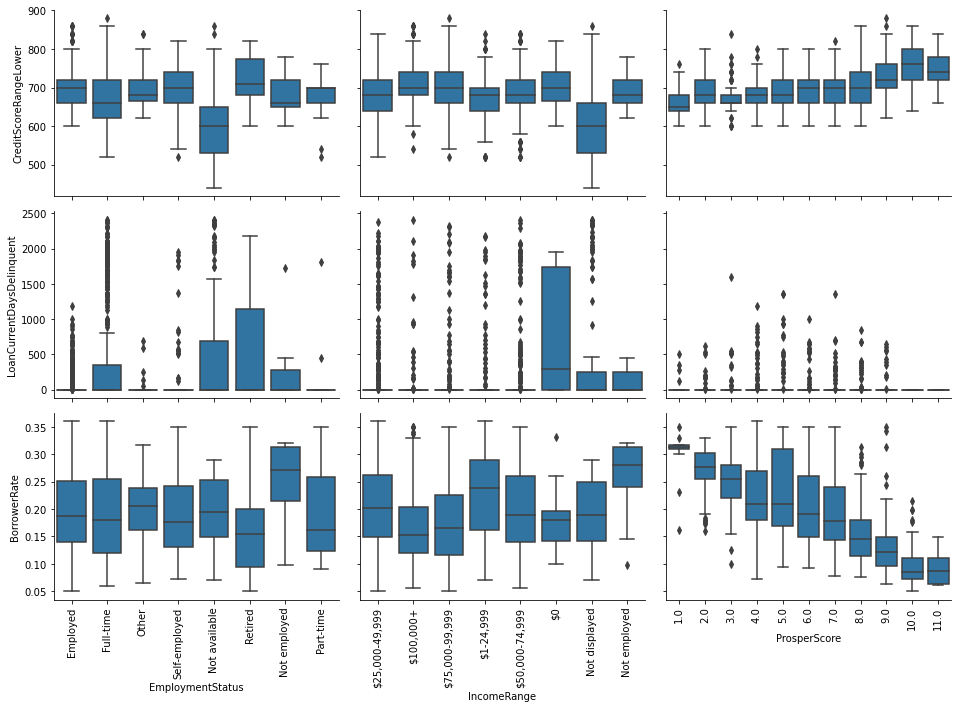

In [30]:
samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.reindex(index = samples)

def boxgrid(x, y, **kwargs):
#Quick hack for creating box plots with seaborn's PairGrid
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = numeric_vars , x_vars = ['EmploymentStatus', 'IncomeRange','ProsperScore'],
                height = 3, aspect = 1.5)
g.map(boxgrid)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show();

As expected, a high Prosper Score leads to a lower Borrower Rate and tends to have a higher Credit Score. 

Not surprisingly that those with 0 or not displayed income are those with the most amount of days delinquent as they are unlikely to pay back the interest rate due to no income. However, those with 0 income has the best credit score among the rest which is interesting and required some further attention.

Those who has EmploymentStatus as unknown has the most amount of days delinquent and may be also associated to those not displayed in income range. They also have the lowest mean in credit score among the rest.

In [31]:
no_income = df[df['IncomeRange'] == '$0']
no_income.loc[:,'Occupation':'LoanNumber']

,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,...,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber
78,Realtor,Full-time,68.0,True,False,NaN,2008-06-29 23:13:04.860000000,720.0,739.0,1995-11-29 00:00:00,...,6.0,0.0,0.0,7750.0,6725.84,0.0,1918,9.0,68,33852
108,Executive,Full-time,27.0,False,False,NaN,2008-04-17 18:17:49.897000000,640.0,659.0,2001-06-22 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,70,30830
772,Other,Full-time,2.0,True,False,NaN,2008-04-03 09:18:51.780000000,820.0,839.0,1992-09-09 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,71,29671
954,Principal,Full-time,54.0,False,True,8A083383777836226E878EE,2008-04-04 14:04:40.970000000,660.0,679.0,1996-09-22 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,71,30065
1346,Sales - Retail,Self-employed,15.0,False,False,NaN,2007-12-11 22:42:14.863000000,520.0,539.0,1999-11-15 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,75,23997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113485,Skilled Labor,Full-time,12.0,True,False,NaN,2008-05-29 18:27:16.033000000,680.0,699.0,2001-01-01 00:00:00,...,10.0,0.0,0.0,10000.0,7768.47,0.0,0,NaN,69,32444
113608,Sales - Commission,Employed,8.0,False,False,NaN,2011-07-21 20:39:16,660.0,679.0,1987-04-23 00:00:00,...,6.0,0.0,0.0,10000.0,8623.87,-81.0,832,9.0,32,51904
113686,Other,Full-time,26.0,False,False,NaN,2007-11-26 11:36:18.257000000,740.0,759.0,1999-09-16 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,75,23589
113767,Other,Self-employed,22.0,False,True,9BBE337094173775621CD34,2008-01-10 11:01:03.310000000,520.0,539.0,2002-08-29 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,1860,17.0,73,27091


In [32]:
no_income['EmploymentStatus'].value_counts()

Full-time        289
Self-employed    257
Part-time         46
Not employed      10
Employed          10
Retired            7
Name: EmploymentStatus, dtype: int64

It seems that majority of the borrower with 0 income are most likely errors as they are employed which is unlikely receiving nothing or work on commision basis

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We found a negative correlation coff of 0.489 between Credit Score and Borrower Rate which is expected. The relationship between high Prosper Score and low Borrower Rate is higher, since Prosper Score takes more variable into consideration instead of just the Credit Score. For the rest, there is no significant relationship.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No other interesting relationship found with other features.

## Multivariate Exploration

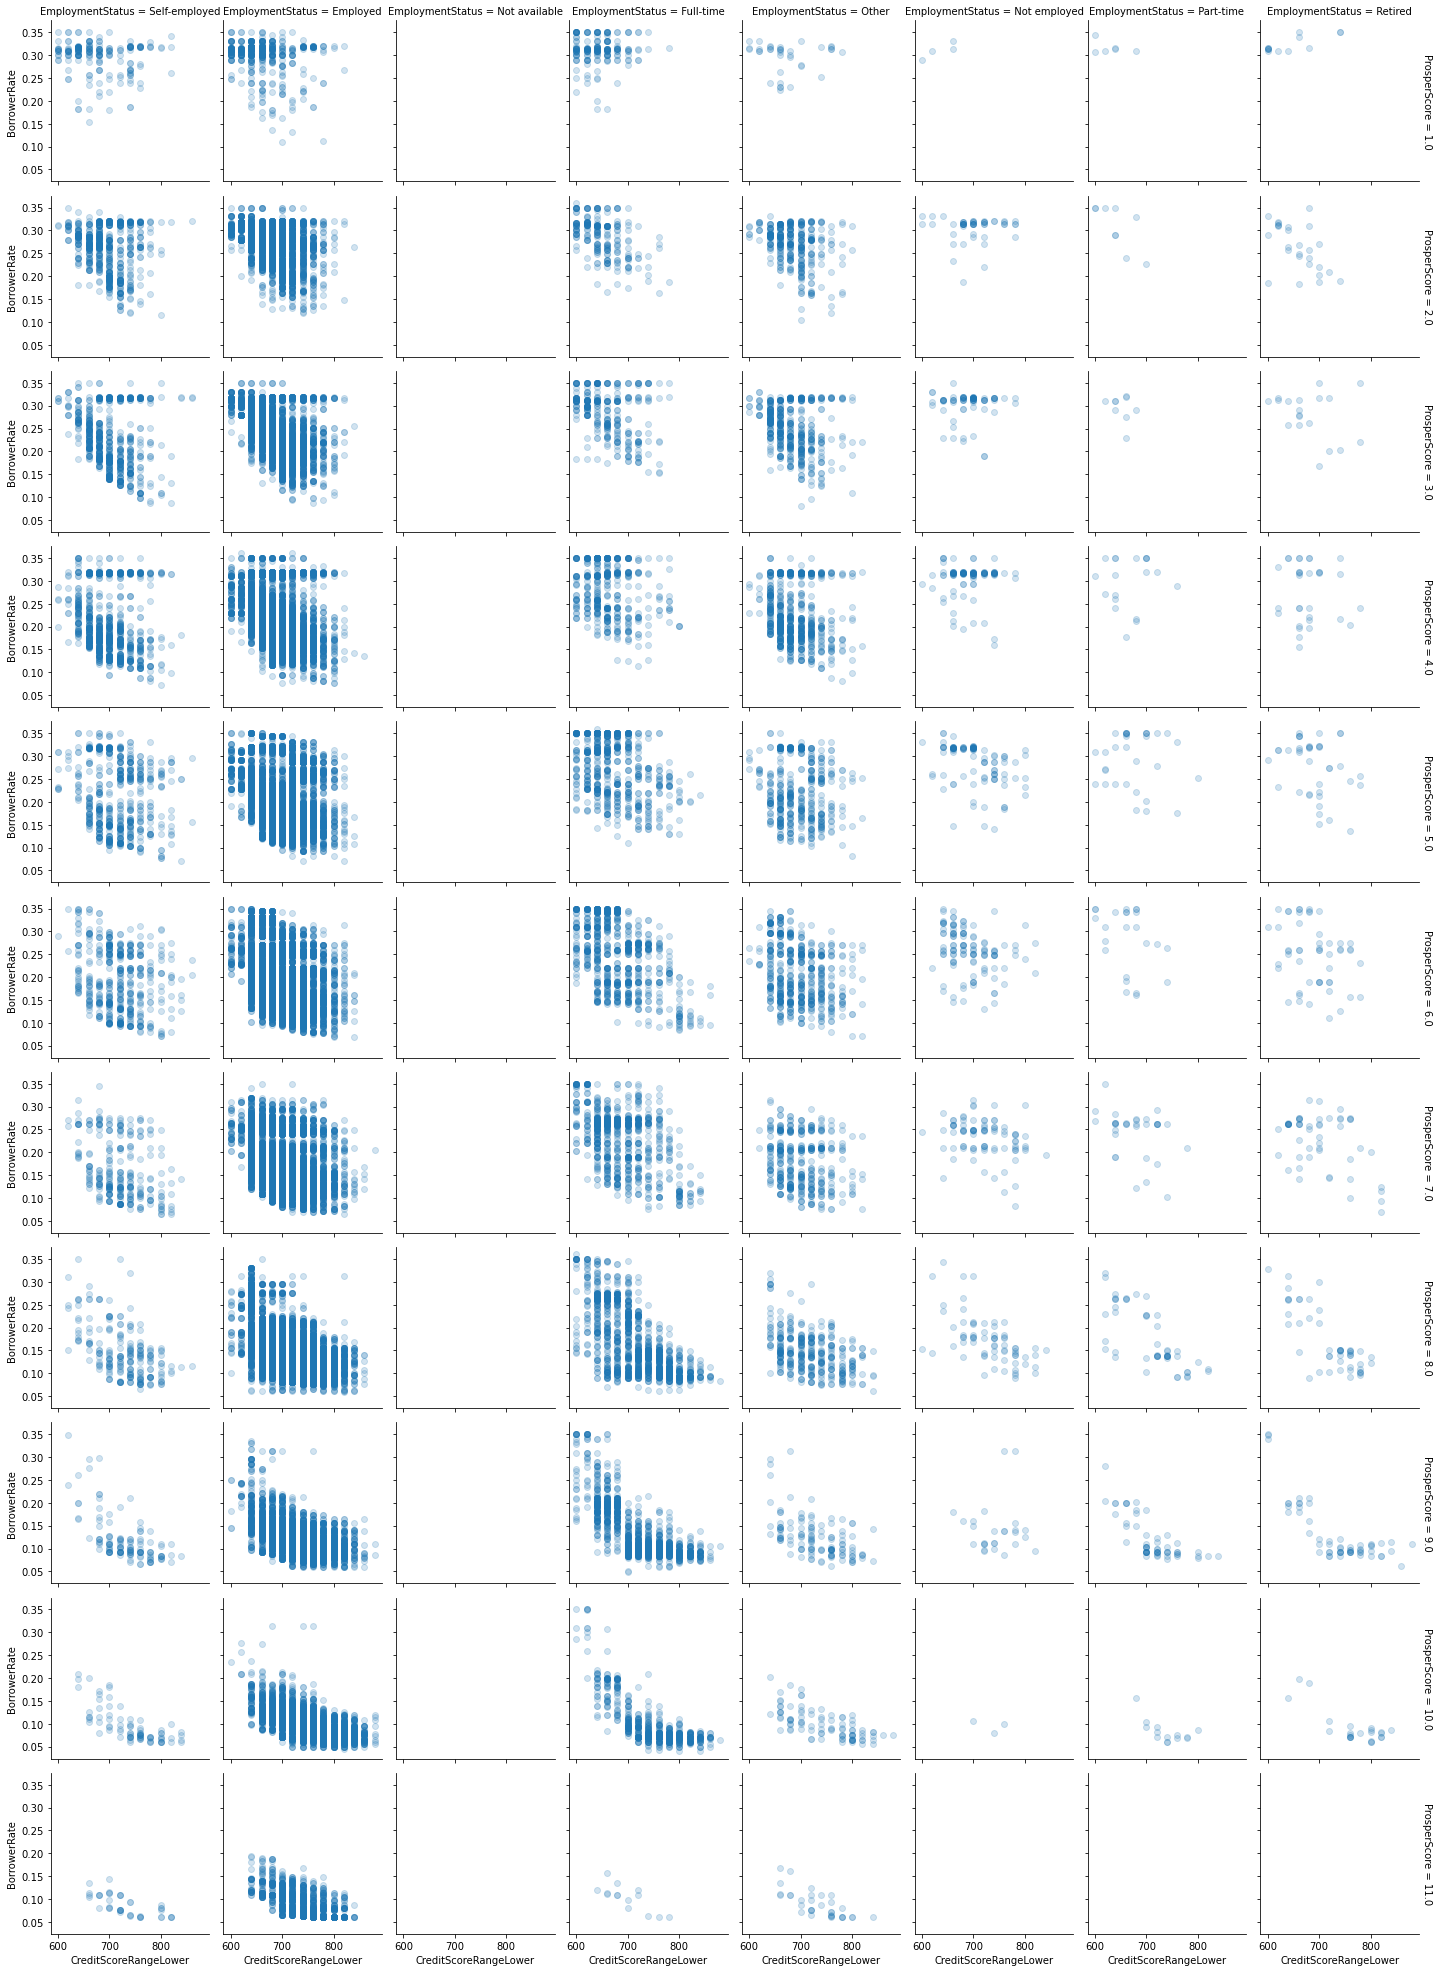

In [33]:
g = sb.FacetGrid(data = df, col = 'EmploymentStatus', row = 'ProsperScore', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'CreditScoreRangeLower', 'BorrowerRate', alpha = 1/5);

The above multivariate shows several indicators:
- It seems that there is no correlation between high credit score leading to higher prosper score, as we can see that each prosper score has a range between 600-900
- We do see that the higher the borrower's credit score, the lower the borrower's rate is regardless of the borrower's employment status

Since the Prosper Score does not provide any insight, we will replace it with Type of loans (ListingCategory_numeric)

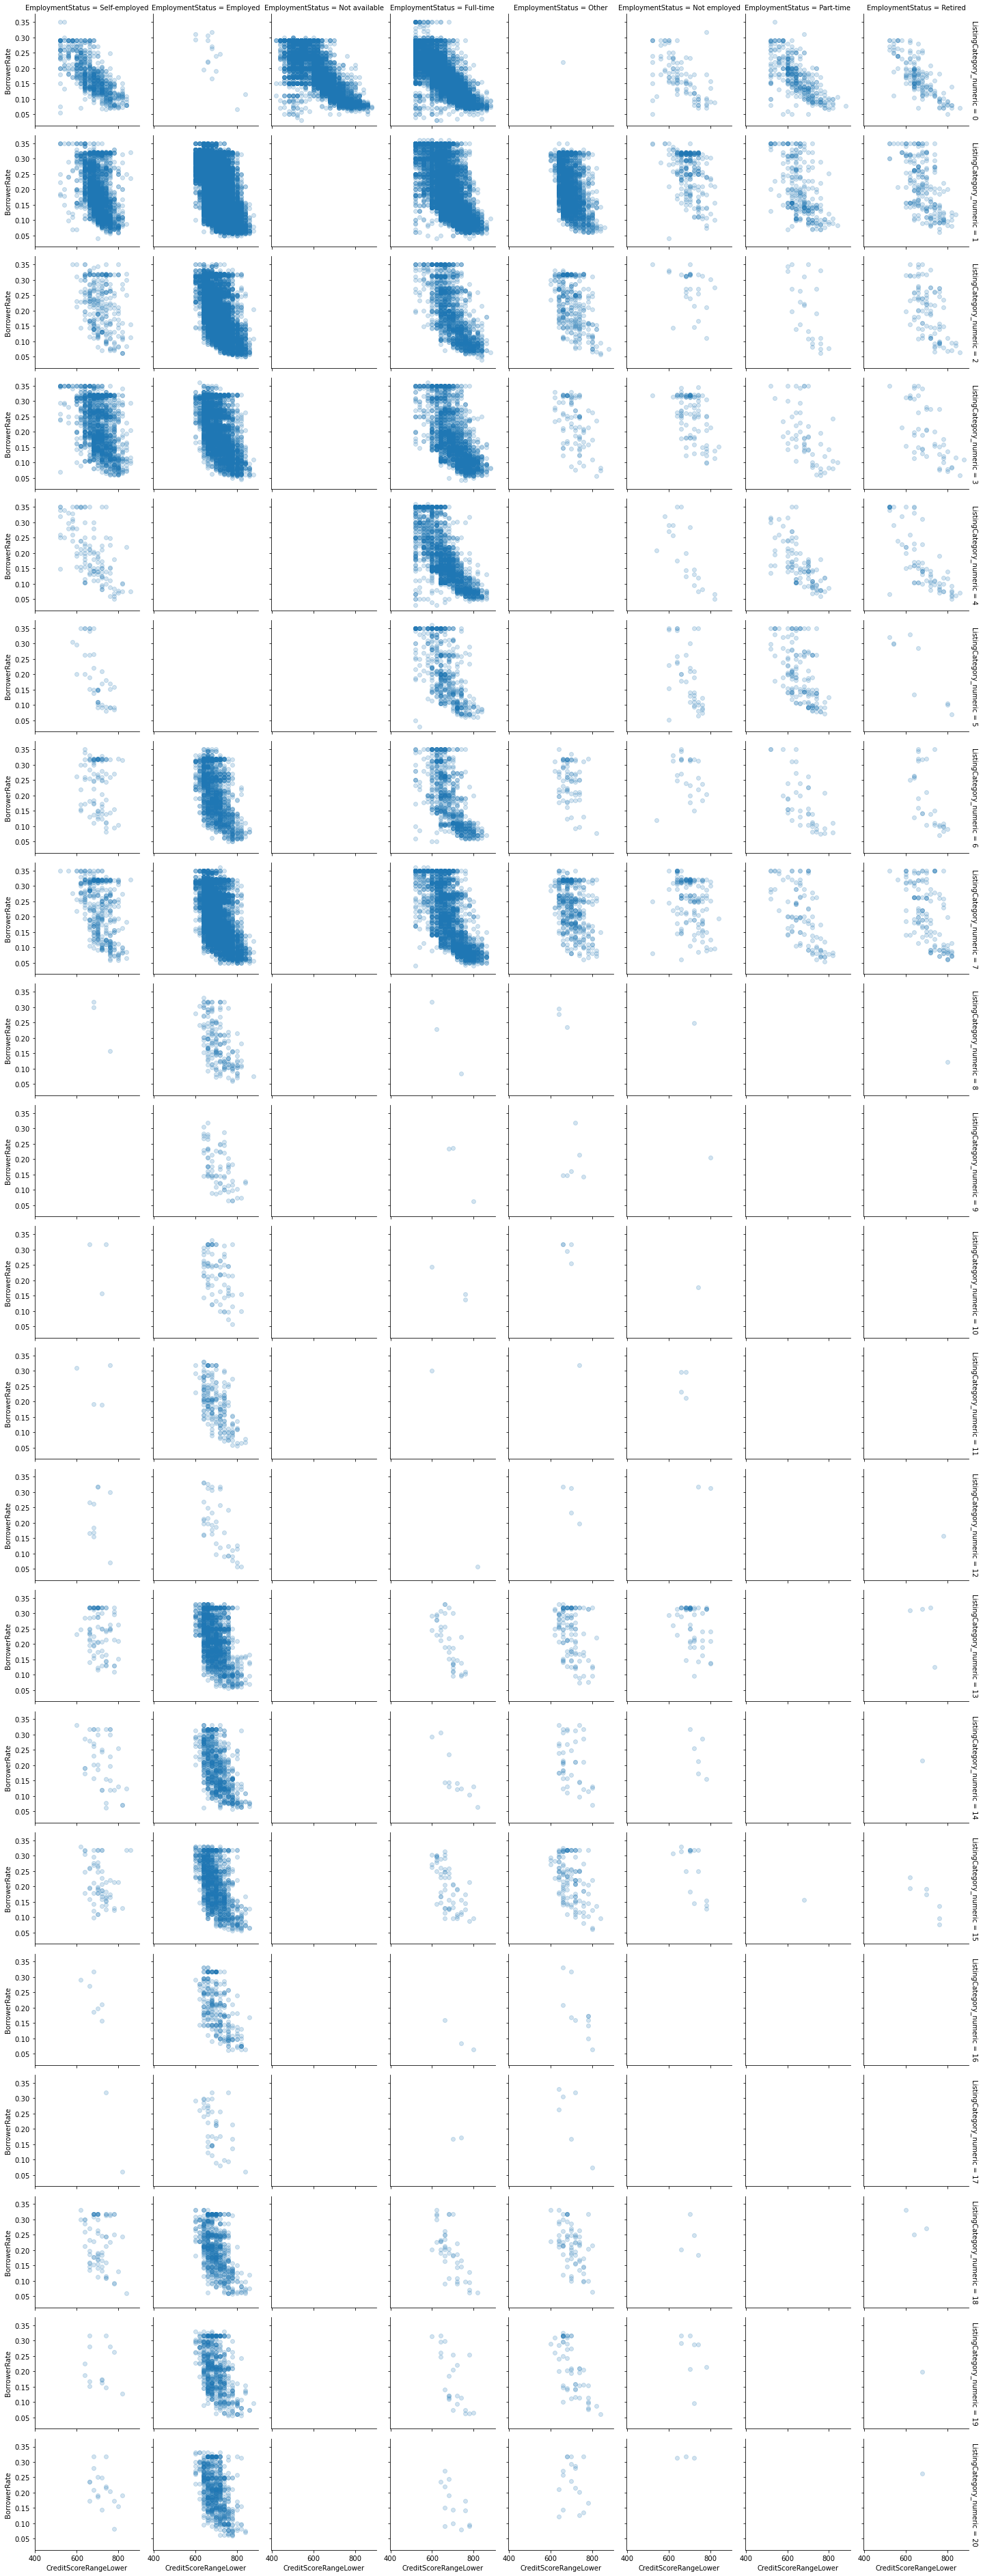

In [34]:
g = sb.FacetGrid(data = df, col = 'EmploymentStatus', row = 'ListingCategory_numeric', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'CreditScoreRangeLower', 'BorrowerRate', alpha = 1/5);

The chart shows no significant correlation between borrower rate vs type of loan

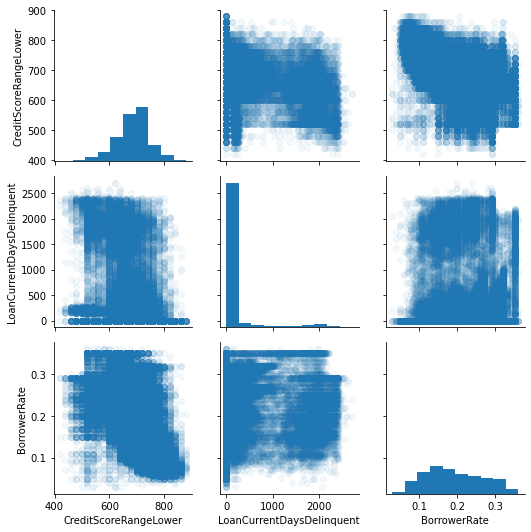

In [35]:
g = sb.PairGrid(data = df, vars = ['CreditScoreRangeLower', 'LoanCurrentDaysDelinquent', 'BorrowerRate'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 1/20);

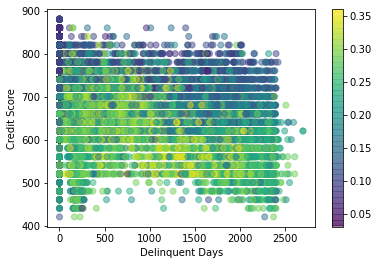

In [36]:
plt.scatter(data = df, x = 'LoanCurrentDaysDelinquent', y = 'CreditScoreRangeLower', c = 'BorrowerRate', alpha = 1/2)
plt.colorbar()
plt.ylabel('Credit Score')
plt.xlabel('Delinquent Days');

Using a pairgrid does not provide us much information, however, when we used a simple scatter plot Days of Delinquent vs Credit Score while using Borrower Rate as the color bar, it provides us a different view.
The scatter plot above shows that the higher the borrower's credit score the lower the borrower rate as shown the darker blue at the top indicating low rates and yellow/green at the bottom indicating higher rates. However, regardless of the credit score, the days of delinquent are spread out from 0 to 2500 days. Shows us that high credit score does not mean lower delinquent days

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The scatter plot with the color bar helped us understand more with the relationship between credit score and delinquent days

### Were there any interesting or surprising interactions between features?

Surprisingly, a good credit score and low borrower rate still has the range of delinquent days similar to those with worse credit score and high borrower rate

In [37]:
df.to_csv('Prosper_Loan_clean.csv')